# Data Visualization - Comparison

## Goal
- Memperkenalkan cara untuk memvisualisasikan perbandingan (comparison) antar data dengan python.

## Referensi
- https://www.tapclicks.com/blog/data-visualization-types

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [91]:
df = pd.read_csv('../data/titanic.csv')

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Comparison Among Item

In [93]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: title={'center': 'Perbandingan Gender Di Kapal Titanic'}, xlabel='Gender', ylabel='Jumlah Orang'>

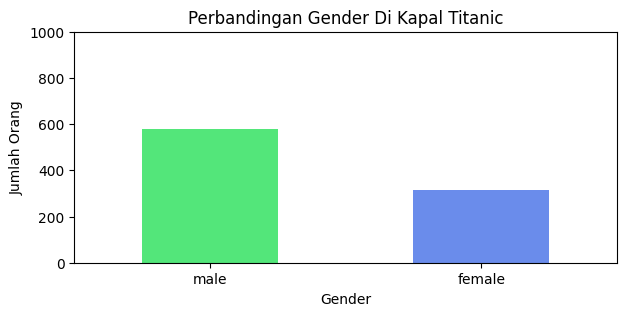

In [94]:
df['Sex'].value_counts().plot(
    kind='bar', 
    figsize=(7,3), 
    xlabel='Gender', 
    ylabel='Jumlah Orang', 
    title='Perbandingan Gender Di Kapal Titanic', 
    rot=0, 
    ylim=(0, 1000), 
    color=['#53e67a', '#6a8ceb'],
    fontsize=10
)

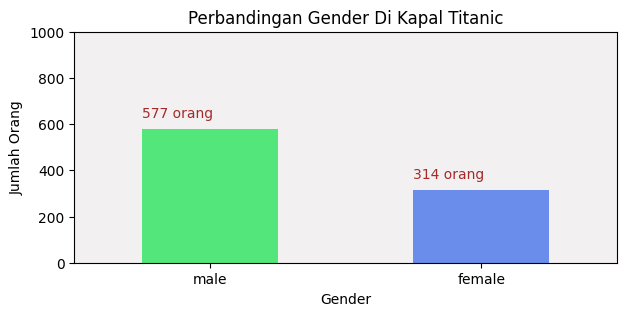

In [95]:
ax = plt.axes()
ax.set_facecolor("#f2f0f0")

df['Sex'].value_counts().plot(
    kind='bar', 
    figsize=(7,3), 
    xlabel='Gender', 
    ylabel='Jumlah Orang', 
    title='Perbandingan Gender Di Kapal Titanic', 
    rot=0, 
    ylim=(0, 1000), 
    color=['#53e67a', '#6a8ceb'],
    fontsize=10,
    ax=ax
)

for p in ax.patches:
    value_y = p.get_height()
    value_x = p.get_x()
    coor_text = (value_x, value_y + 50)
    annt_text = "{} orang".format(value_y)
    ax.annotate(annt_text, coor_text, color='brown')

In [97]:
table = pd.pivot_table(df, values='PassengerId', index=['Sex'],
                       columns=['Embarked'], aggfunc="count")

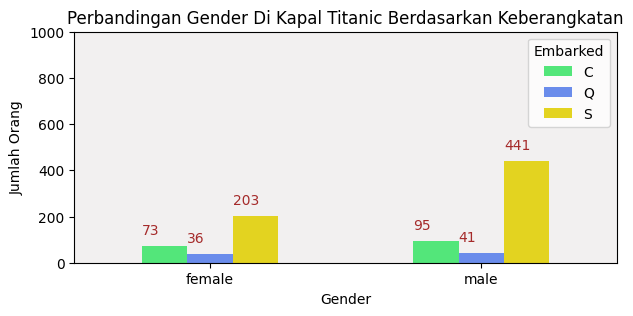

In [115]:
ax = plt.axes()
ax.set_facecolor("#f2f0f0")

table.plot(
    kind='bar', 
    figsize=(7,3), 
    xlabel='Gender', 
    ylabel='Jumlah Orang', 
    title='Perbandingan Gender Di Kapal Titanic Berdasarkan Keberangkatan', 
    rot=0, 
    ylim=(0, 1000), 
    color=['#53e67a', '#6a8ceb', '#e3d320'],
    fontsize=10,
    ax=ax
)

for p in ax.patches:
    value_y = p.get_height()
    value_x = p.get_x()
    coor_text = (value_x, value_y + 50)
    annt_text = "{}".format(value_y)
    ax.annotate(annt_text, coor_text, color='brown')

-0.25 64 (67, -0.15) 64
0.75 115 (118, 0.85) 115
1.75 230 (233, 1.85) 230
2.75 155 (158, 2.85) 155
3.75 86 (89, 3.85) 86
4.75 42 (45, 4.85) 42
5.75 22 (25, 5.85) 22
6.75 177 (180, 6.85) 177


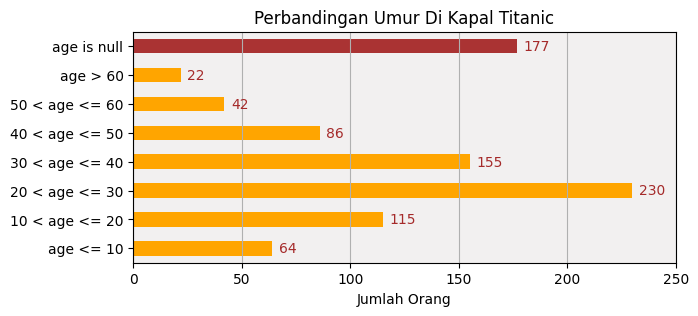

In [223]:
ax = plt.axes()
ax.set_facecolor("#f2f0f0")

df['Age'].fillna(-1).apply(
    lambda x: 'Null' if x == -1 else 
              'A' if x <= 10 else 
              'B' if x <= 20 else
              'C' if x <= 30 else
              'D' if x <= 40 else
              'E' if x <= 50 else
              'F' if x <= 60 else 'G').value_counts().sort_index().plot(
    kind='barh',
    figsize=(7,3), 
    xlabel='Jumlah Orang', 
    ylabel='Umur', 
    title='Perbandingan Umur Di Kapal Titanic', 
    rot=0, 
    xlim=(0, 250), 
    fontsize=10,
    color='orange',
    ax=ax
)

for p in ax.patches:
    value_y = p.get_y()
    value_x = p.get_width()
    coor_text = (value_x+3, value_y+0.1)
    annt_text = "{}".format(value_x)
    ax.annotate(annt_text, coor_text, color='brown')
    print(value_y, value_x, coor_text, annt_text)

ax.xaxis.grid(True)
ax.set_yticklabels([
    'age <= 10', 
    '10 < age <= 20',
    '20 < age <= 30',
    '30 < age <= 40',
    '40 < age <= 50',
    '50 < age <= 60',
    'age > 60',
    'age is null'
])
ax.set_ylabel(None)
ax.patches[-1].set_facecolor('#aa3333')


### 2. Comparison Among Time

In [265]:
df = pd.read_csv('../data/stock.csv', header=[0,1], index_col=0)

In [267]:
df.head()

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AMZN,AMZN,AMZN,AMZN,AMZN,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,,,,,,,,,,
2019-01-02,37.708603,37.930673,36.827493,36.985091,148158800,76.956497,77.667999,73.046501,73.260002,159662000,95.310547,95.904350,93.255790,93.830745,35329300
2019-01-03,33.952545,34.795449,33.907176,34.379965,365248800,75.014000,76.900002,74.855499,76.000504,139512000,91.804245,94.433957,91.615731,94.349124,42579100
2019-01-04,35.401951,35.471200,34.336981,34.511292,234428400,78.769501,79.699997,75.915497,76.500000,183652000,96.074005,96.620685,93.246359,93.990973,44060600
2019-01-07,35.323147,35.538054,34.838418,35.507011,219111200,81.475502,81.727997,79.459503,80.115501,159864000,96.196533,97.337016,95.178586,95.800664,35656100
2019-01-08,35.996532,36.252032,35.464047,35.712380,164101200,82.829002,83.830498,80.830498,83.234497,177628000,96.894035,97.996816,95.866653,97.120245,31514400


<Axes: title={'center': 'Stock Close Price Comparison'}, xlabel='Stock Date', ylabel='Price in USD'>

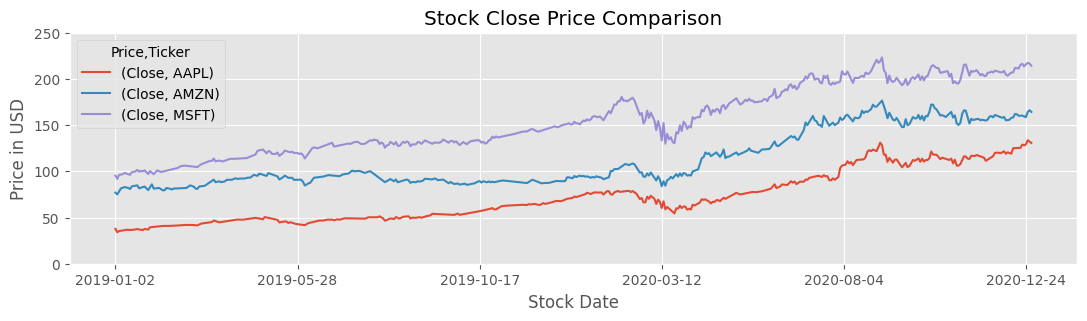

In [303]:
plt.style.use('ggplot')
sel_cols = [i for i in list(df) if i[0] == 'Close']
df[sel_cols].plot(
    kind='line',
    figsize=(13,3), 
    xlabel='Stock Date', 
    ylabel='Price in USD', 
    title='Stock Close Price Comparison', 
    ylim=(0, 250)
)

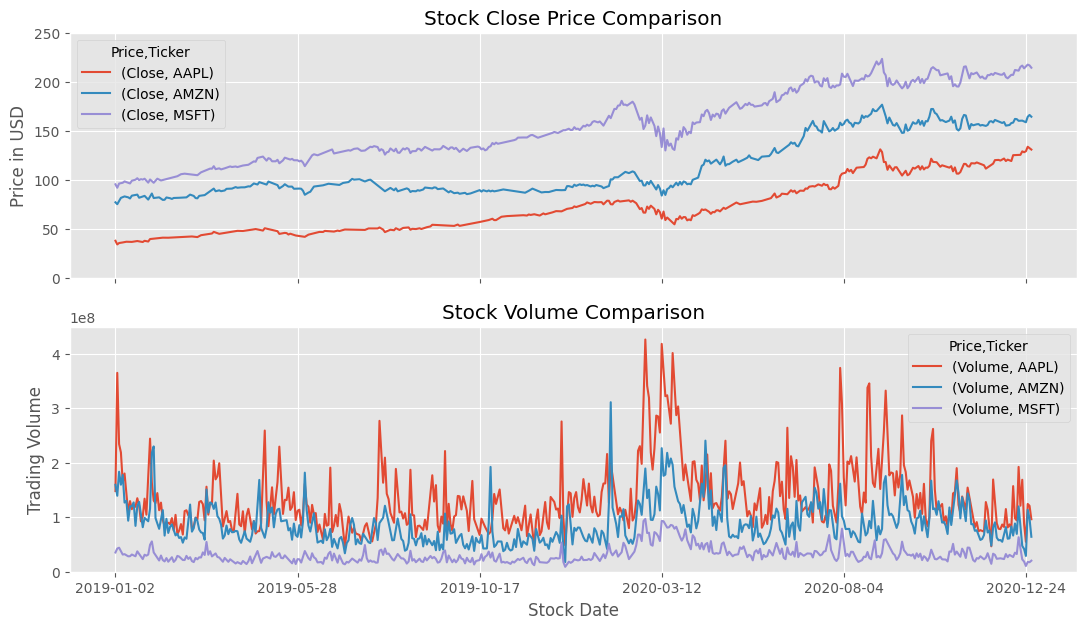

In [306]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

sel_cols = [i for i in list(df) if i[0] == 'Close']
df[sel_cols].plot(
    kind='line',
    figsize=(13,7), 
    xlabel='Stock Date', 
    ylabel='Price in USD', 
    title='Stock Close Price Comparison', 
    ylim=(0, 250),
    ax = ax1
)

sel_cols = [i for i in list(df) if i[0] == 'Volume']
df[sel_cols].plot(
    kind='line',
    figsize=(13,7), 
    xlabel='Stock Date', 
    ylabel='Trading Volume', 
    title='Stock Volume Comparison', 
    ylim=(0, 450000000),
    ax=ax2
)

plt.show()